In [1]:
import vipir as vp
import matplotlib
from matplotlib import cm
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

In [2]:
cdf = vp.vipir(r"./netcdf/WI937_2020004132603.NGI")

In [3]:
cdf.station

'Wallops Island'

In [4]:
cdf.obs_time

datetime.datetime(2020, 1, 4, 13, 26, 3, tzinfo=datetime.timezone.utc)

In [5]:
cdf.station_location

{'longitude': -75.47799682617188,
 'latitude': 37.9370002746582,
 'altitude': 10.0}

In [6]:
(cdf.minfreq, cdf.maxfreq, cdf.nfreq)

(1201.0, 22470.455, 328)

In [7]:
(cdf.minrng, cdf.maxrng, cdf.nrng)

(-4.5010376, 1433.0038, 960)

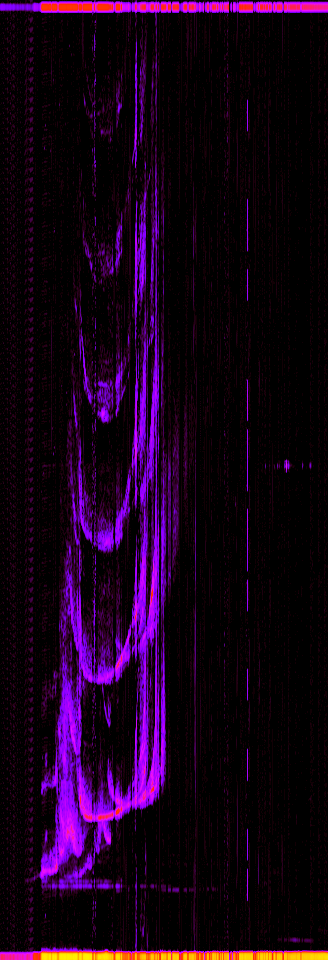

In [8]:
display(cdf.image())

In [15]:
cdf.pixel_to_coords((0,0))

AssertionError: 

In [9]:
jv4 = vp.vipir(r'./netcdf/JV433_2019323104500.NGI')

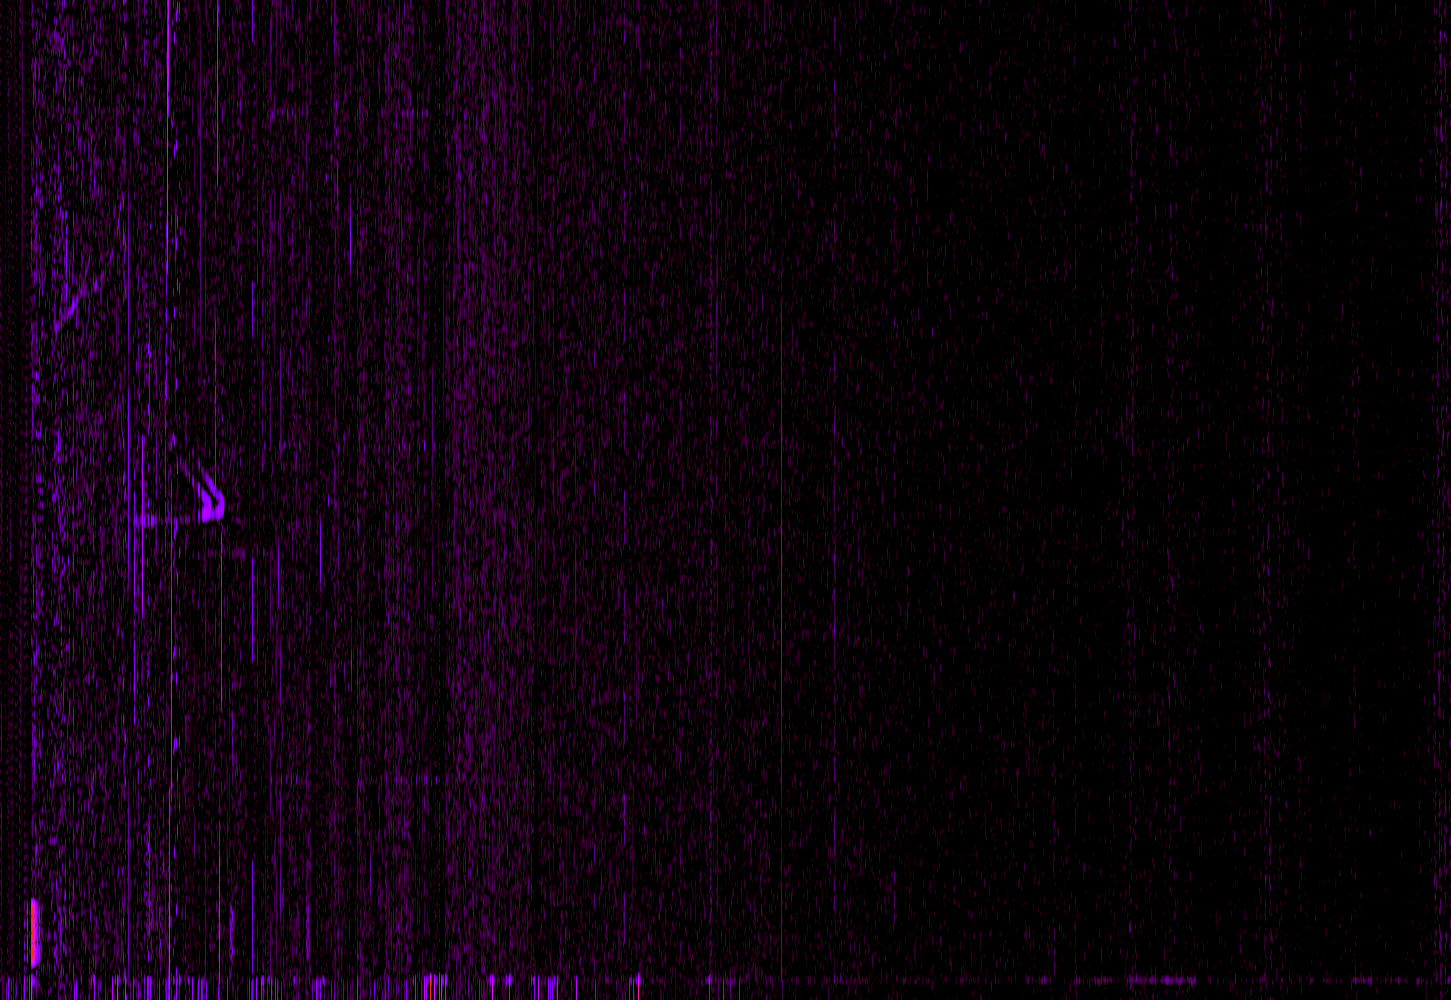

In [10]:
display(jv4.image())

In [11]:
jv4.total_power.shape

(1451, 1000)

In [12]:
cdf.total_power.shape

(328, 960)

In [14]:
print(f'{cdf.station}: minfreq: {cdf.freq.min()}, maxfreq: {cdf.freq.max()}, minrange: {cdf.rng.min()}, maxrange: {cdf.rng.max()}')
print(f'{jv4.station}: minfreq: {jv4.freq.min()}, maxfreq: {jv4.freq.max()}, minrange: {jv4.rng.min()}, maxrange: {jv4.rng.max()}')

Wallops Island: minfreq: 1201.0, maxfreq: 22470.455078125, minrange: -4.50103759765625, maxrange: 1433.0037841796875
Jeju: minfreq: 1000.0, maxfreq: 30000.0, minrange: -124.50103759765625, maxrange: 1372.9622802734375


In [15]:
import pandas as pd

In [17]:
pd.Timestamp(cdf.obs_time)

Timestamp('2020-01-04 13:26:03+0000', tz='UTC')

In [4]:
snr=cdf.snr()
minsnr = snr.min()
maxsnr = snr.max()

In [5]:
(minsnr, maxsnr)

(-15.980059, 86.2759)

In [6]:
cmap = matplotlib.cm.get_cmap('gnuplot')

In [7]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)

In [8]:
cmap(norm(5.0))

(0.21693045781865616, 0.00010421331162222673, 0.2913897468893246, 1.0)

In [9]:
cmap(norm(np.linspace(5.0,7.0,10)), bytes=True)

array([[ 55,   0,  74, 255],
       [ 57,   0,  80, 255],
       [ 57,   0,  80, 255],
       [ 59,   0,  86, 255],
       [ 61,   0,  92, 255],
       [ 61,   0,  92, 255],
       [ 63,   0,  97, 255],
       [ 63,   0,  97, 255],
       [ 65,   0, 103, 255],
       [ 65,   0, 103, 255]], dtype=uint8)

In [10]:
snr_np = cmap(norm(snr.T), bytes=True)

In [11]:
snr_np.shape

(960, 328, 4)

In [12]:
snr_im = Image.fromarray(snr_np, mode='RGBA').transpose(Image.FLIP_TOP_BOTTOM)

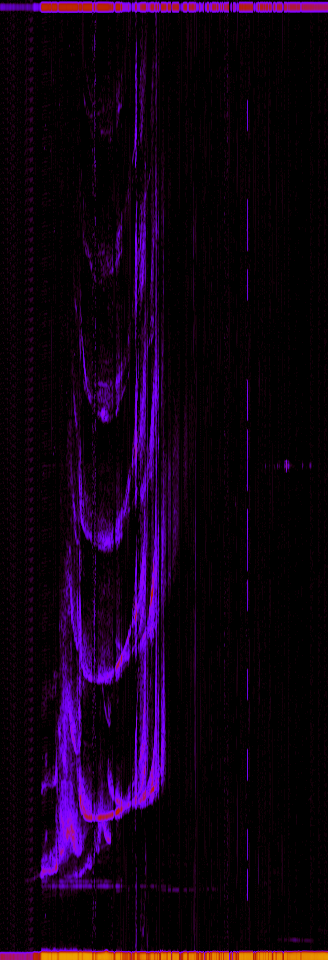

In [13]:
display(snr_im)

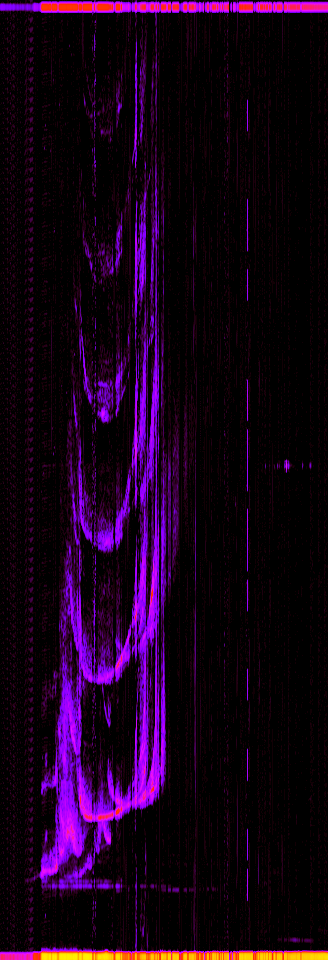

In [14]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(snr_im)
display(enh.enhance(1.5))

In [15]:
snr_im.size

(328, 960)

In [22]:
from PIL import ImageDraw

In [31]:
box = [(150,300), (150,450), (225,450), (225,300),(150,300)]

In [32]:
snr_im.size

(328, 960)

In [ ]:
def coords_to_pix(freq, rng):
    # the index of freq and rng in their respective arrays are the image pixel indexes
    

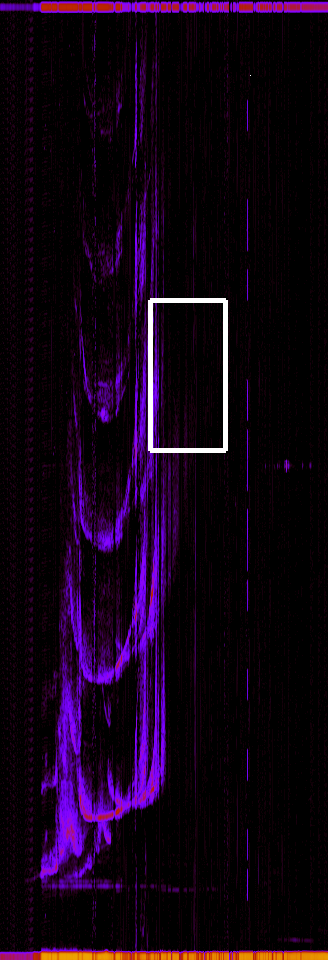

In [36]:
snr_im = Image.fromarray(snr_np, mode='RGBA').transpose(Image.FLIP_TOP_BOTTOM)
draw = ImageDraw.Draw(snr_im)
draw.line(box, fill=128, width=5, joint='curve')
draw.point((250,75),fill=255)
#out = Image.alpha_composite(snr_im, draw)
display(snr_im)

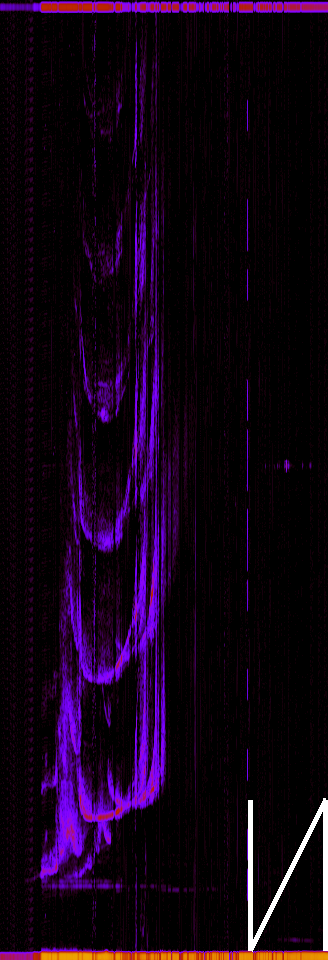

In [18]:
display(snr_im)

In [ ]:
PIL.ImageDraw.ImageDraw.line(xy, fill=None, width=0, joint=None)

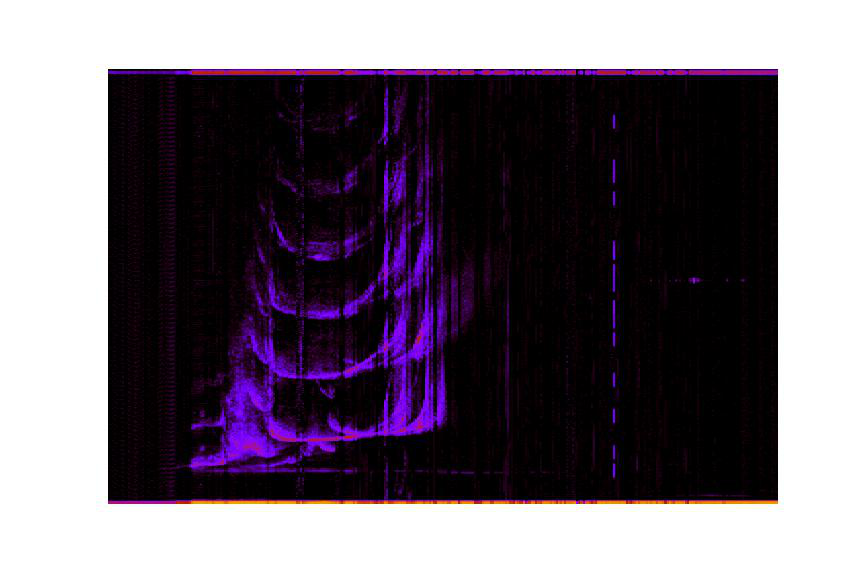

In [21]:
display(test_im)

In [25]:
test_im=Image.open('testplot.jpg')

In [26]:
a = np.asarray(test_im)

In [27]:
a.shape

(576, 864, 3)

In [28]:
a[220,220]

array([3, 0, 2], dtype=uint8)

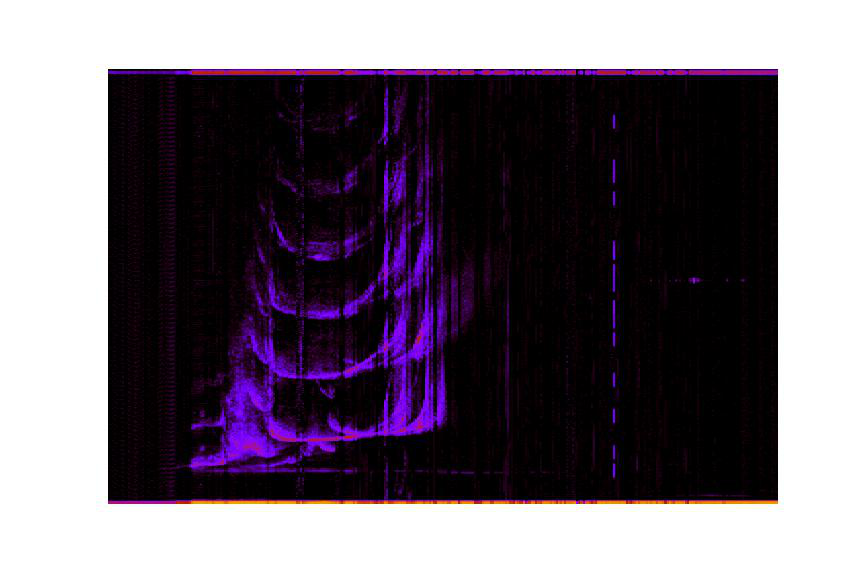

In [29]:
test_im